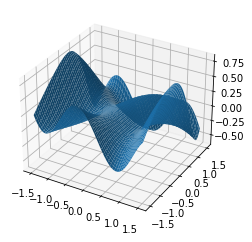

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def dichotomy(f, a, b, eps):
    while (b - a) / 2 > eps:
        x1 = (a + b) / 2 - eps / 2
        x2 = (a + b) / 2 + eps / 2

        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1

    return (a + b) / 2


def gradient_descent(x0, lr, eps, max_iter):
    x = x0
    points = np.array([x])
    i = 1

    while i < max_iter:
        grad_res = grad(x)

        if np.linalg.norm(grad_res) < eps:
            break

        line_search_f = lambda alpha: f(x - alpha * grad_res)
        alpha = dichotomy(line_search_f, 0, 1, eps)
        x = x - lr * alpha * grad_res

        points = np.vstack([points, x])
        i += 1

    print(i)
    return points


def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

def grad(x):
    h = 1e-5
    return (f(x[:, np.newaxis] + h * np.eye(2)) - f(x[:, np.newaxis] - h * np.eye(2)))/(2*h)


t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(np.stack((X, Y))))


745
[-0.82291982 -0.49941265] -0.04198326471847133


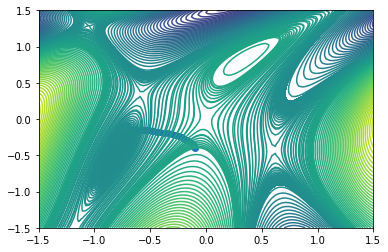

In [42]:
x0 = np.array([-0.1, -0.4])
lr = 0.1
eps = 1e-6
max_iter = 1000

result = gradient_descent(x0, lr, eps, max_iter)

plt.plot(result[:, 0], result[:, 1], 'o-')
plt.contour(X, Y, f(np.stack((X, Y))), levels=np.sort(np.concatenate((f(result.T), np.linspace(-1, 1, 100)))))
print(result[-1], f(result[-1]))